In [67]:
# !pip3 install pandas
# !pip3 install numpy
# !pip3 install matplotlib
# !pip3 install seaborn
# !pip3 install scikit-learn
# !pip3 install yellowbrick

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick


In [69]:
def load_data():
  global df
  try: 
    df = pd.read_csv("../data/smoking.csv")
  except FileNotFoundError:
    from google.colab import drive
    drive.mount('/content/drive')
    df=pd.read_csv('/content/drive/MyDrive/MD/Laboratori/Practica 2/data/smoking.csv')

In [70]:
load_data()

In [71]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [72]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,55692.0,NaN,NaN,NaN,27845.5,16077.039933,0.0,13922.75,27845.5,41768.25,55691.0
gender,55692,2,M,35401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,55692.0,NaN,NaN,NaN,44.182917,12.071418,20.0,40.0,40.0,55.0,85.0
height(cm),55692.0,NaN,NaN,NaN,164.649321,9.194597,130.0,160.0,165.0,170.0,190.0
weight(kg),55692.0,NaN,NaN,NaN,65.864936,12.820306,30.0,55.0,65.0,75.0,135.0
waist(cm),55692.0,NaN,NaN,NaN,82.046418,9.274223,51.0,76.0,82.0,88.0,129.0
eyesight(left),55692.0,NaN,NaN,NaN,1.012623,0.486873,0.1,0.8,1.0,1.2,9.9
eyesight(right),55692.0,NaN,NaN,NaN,1.007443,0.485964,0.1,0.8,1.0,1.2,9.9
hearing(left),55692.0,NaN,NaN,NaN,1.025587,0.157902,1.0,1.0,1.0,1.0,2.0
hearing(right),55692.0,NaN,NaN,NaN,1.026144,0.159564,1.0,1.0,1.0,1.0,2.0


In [73]:
df.drop(columns=['ID', 'oral'], axis=1, inplace=True)

In [74]:
df['gender'] = (df['gender'] == 'M').astype(int)
df['tartar'] = (df['tartar'] == 'Y').astype(int)

In [75]:
print(df['gender'].value_counts())
print(df['tartar'].value_counts())

gender
1    35401
0    20291
Name: count, dtype: int64
tartar
1    30940
0    24752
Name: count, dtype: int64


In [76]:
df.isna().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [77]:
## split train and test
from sklearn.model_selection import train_test_split
X = df.drop(columns=['smoking'], axis=1)
Y = df['smoking']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

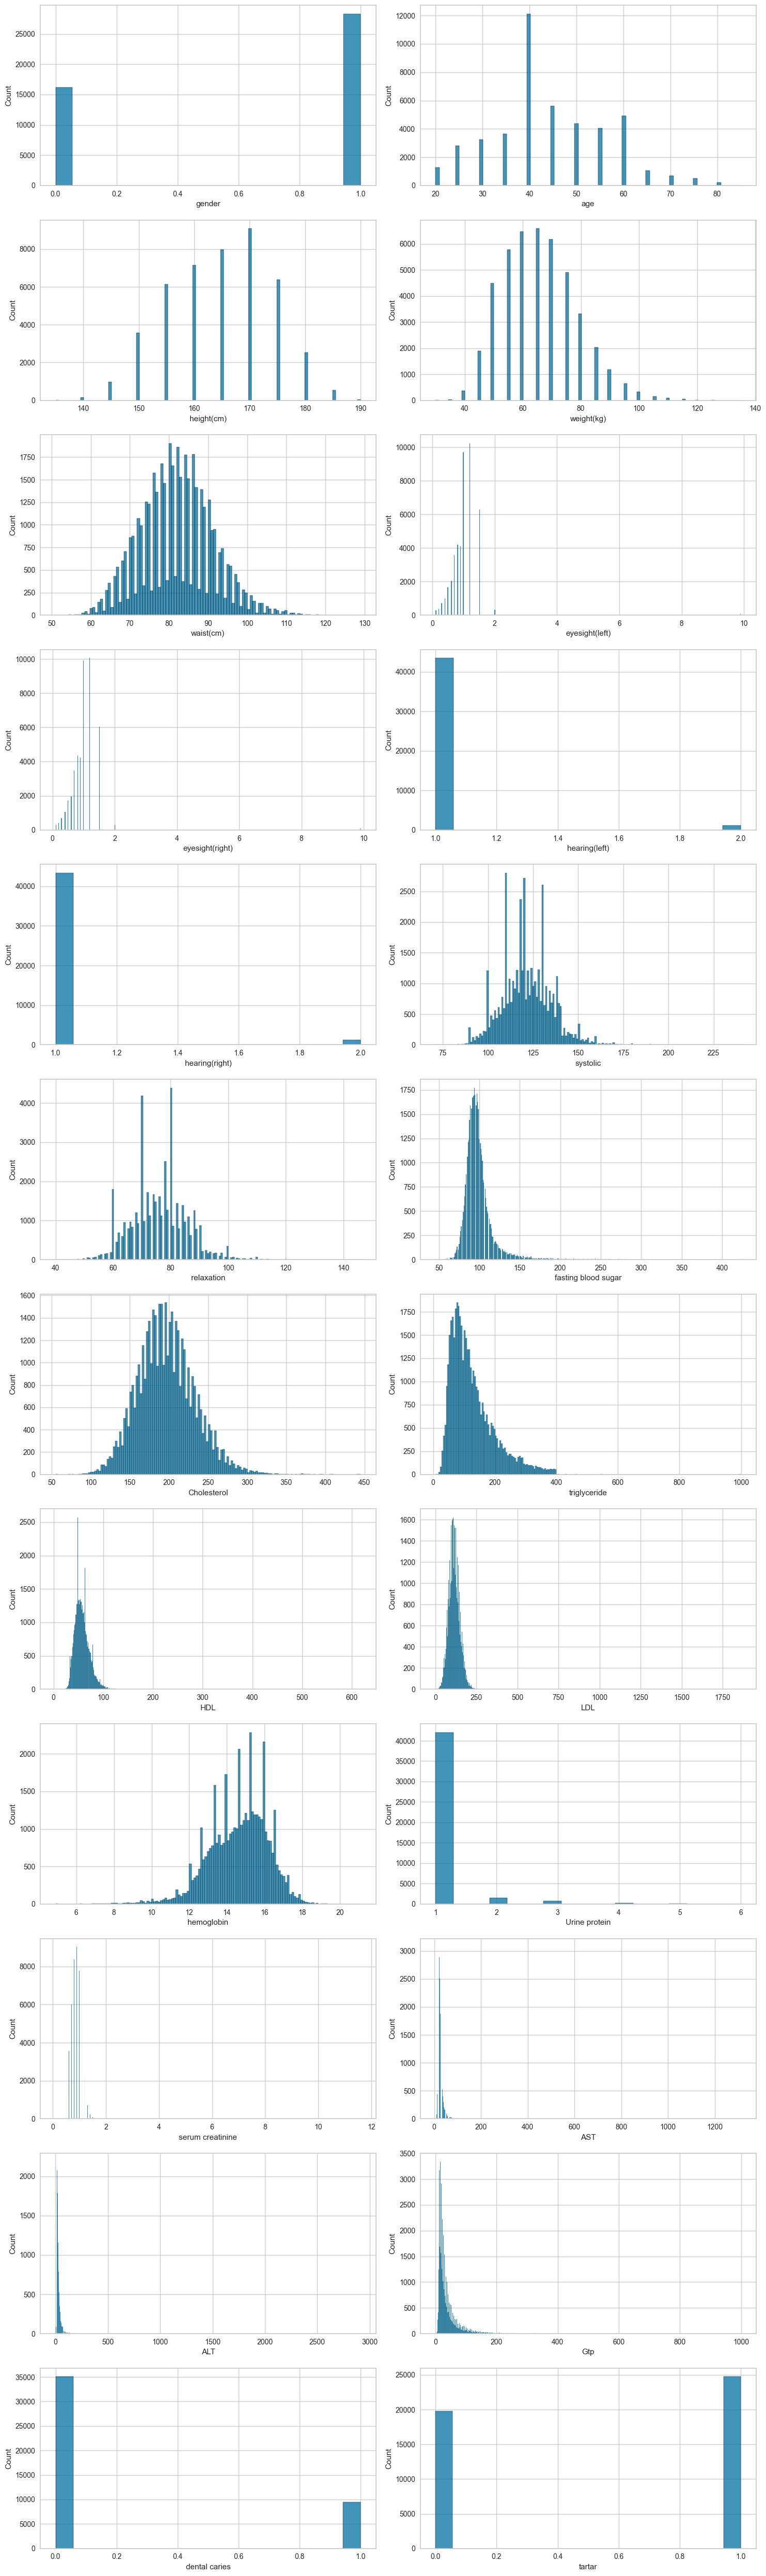

In [78]:
fig, axes = plt.subplots(12,2,figsize=(15,50))
X_train_frame = pd.DataFrame(X_train)
X_train_frame.columns=X.columns
for i, c in enumerate(X.columns):
    ax = axes.reshape(-1)[i]
    if X_train_frame[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=X_train_frame,ax=ax)
    else:
        b = sns.histplot(x=c,data=X_train_frame,ax=ax)
plt.tight_layout()

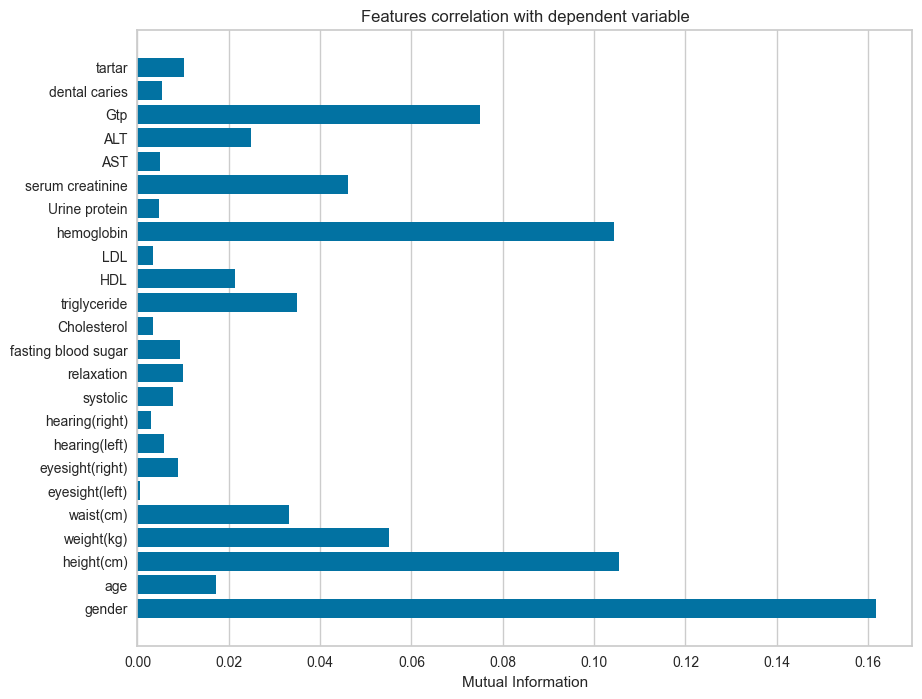

In [62]:
from yellowbrick.target.feature_correlation import feature_correlation
plt.figure(figsize=(10,8))
visualizer = feature_correlation(X_train, Y_train, labels=list(X_train.columns),method='mutual_info-classification');

In [50]:
## normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

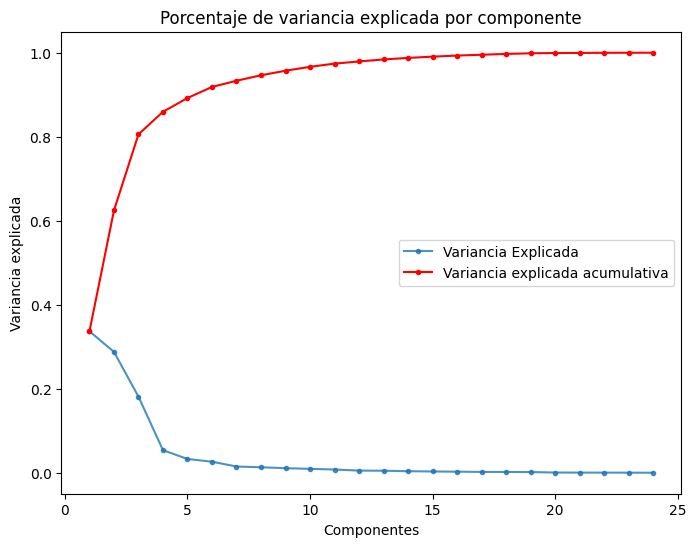

In [51]:
## permorm PCA
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_n)

fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


<Axes: >

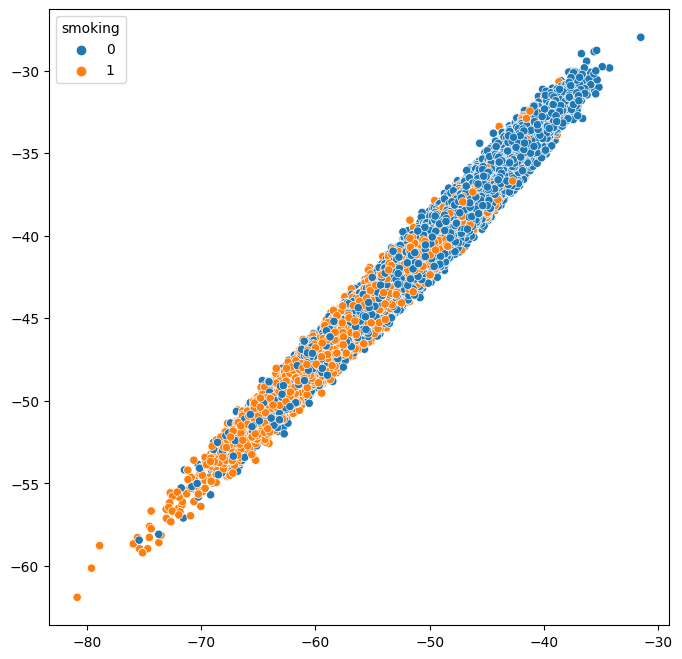

In [56]:
X_trans = pca.transform(X_train)
plt.figure(figsize=(8,8));
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=Y_train)